# Worksheet 06

Name:  Jeong Yong Yang
UID: U95912941

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

The difference between K means and K means ++ is the method to declare the centroid. When using K means, we randomly select k centroids. However, when using K means ++, we only initialize one point in random and find other centroids by using probability. The probability of choosing the next centroid is directly proportional to its distance from the previously selected centroid, implying that the further away the previous centroid is from a point, the most likely it will be chosen as the next centroid. K means ++, unlike K means, can solve the issue of the initial k centroids being too close to each other, which is not efficient.

b) What are some limitations of K means ++?

Some limitations of K means ++ is that it is not effective when there are possible outliers within the dataset and that it does not perform well when identifying clusters that are non-spherical or irregularly shaped. Finally, it does not work well with spiral datasets.


c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

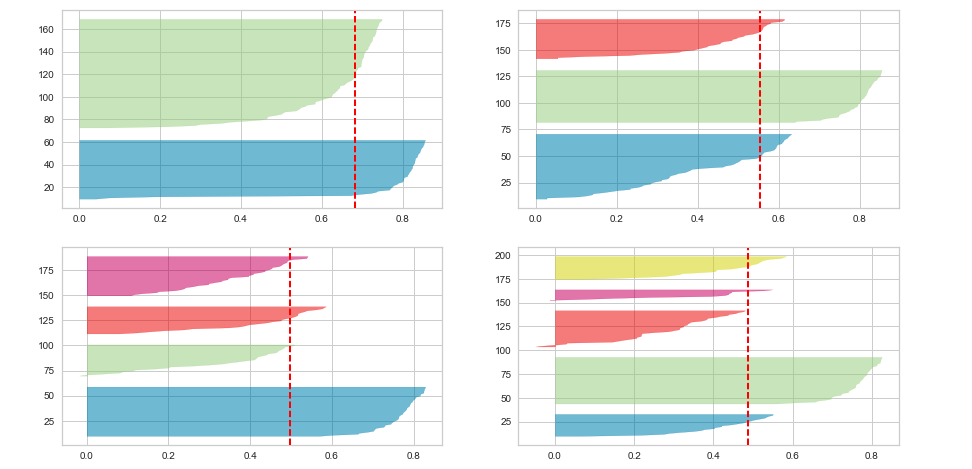

In [ ]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

I would choose K = 2 because it marks the highest average silhouette score compared to when K = 3, 4, and 5, indicating that K = 2 fits the data points into clusters the best. In addition, all of the clusters in K =2 passes the average silhouette score. Finally, the two clusters in K = 2 have a clear distinction, indicating a good separation between the two clusters.


### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |√2 | 3 | 1 |2√2|
| B |√2 | 0 |√5 | 1 |√2 |
| C | 3 |√5 | 0 |√10|√5 |
| D | 1 | 1 |√10| 0 |√5 |
| E |2√2|√2 |√5 |√5 | 0 |

Step 2

|   | A |B&D| C | E |
|---|---|---|---|---|
| A | 0 | 1 | 3 |2√2|
|B&D| 1 | 0 |√5 |√2 |
| C | 3 |√5 | 0 |√5 |
| E |2√2|√2 |√5 | 0 |

Step 3

|     |A&B&D| C | E |
|-----|-----|---|---|
|A&B&D|  0  |√5 |√2 |
|  C  | √5  | 0 |√5 |
|  E  | √2  |√5 | 0 |

Step 4

|       |A&B&D&E| C |
|-------|-------|---|
|A&B&D&E|   0   |√5 |
|   C   |  √5   | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |√2 | 3 | 1 |2√2|
| B |√2 | 0 |√5 | 1 |√2 |
| C | 3 |√5 | 0 |√10|√5 |
| D | 1 | 1 |√10| 0 |√5 |
| E |2√2|√2 |√5 |√5 | 0 |

Step 2

|   | A |B&D| C | E |
|---|---|---|---|---|
| A | 0 |√2 | 3 |2√2|
|B&D|√2 | 0 |√10|√5 |
| C | 3 |√10| 0 |√5 |
| E |2√2|√5 |√5 | 0 |

Step 3

|     |A&B&D| C | E |
|-----|-----|---|---|
|A&B&D|  0  |√10|2√2|
|  C  | √10 | 0 |√5 |
|  E  | 2√2 |√5 | 0 |

Step 4

|     |A&B&D|C&E|
|-----|-----|---|
|A&B&D| 0   |√10|
| C&E |√10  | 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

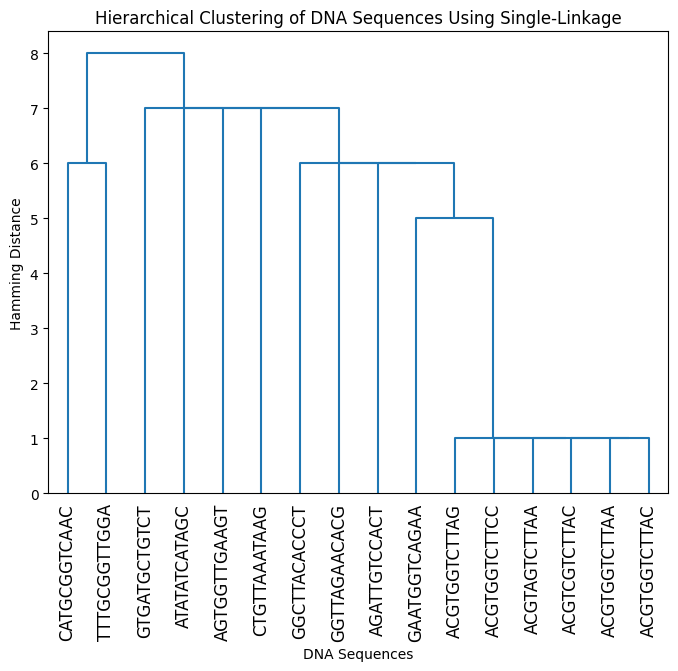

In [33]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

def hammingDistance(seqOne, seqTwo):
    if len(seqOne) != len(seqTwo):
      raise ValueError("Two sequences must have same length")
    count = 0
    for x in range(len(seqOne)):
      if seqOne[x] != seqTwo[x]:
        count += 1
    return count

lengthOfData = len(sequences)
distanceMatrix = [[hammingDistance(sequences[i], sequences[j]) for j in range(lengthOfData)] for i in range(lengthOfData)]

distanceMatrix = squareform(distanceMatrix, checks = False)

Z = linkage(distanceMatrix, 'single')

# Generate the dendrogram
plt.figure(figsize = (8, 6))
dendrogram(Z, labels = sequences, leaf_rotation = 90, color_threshold = 1)
plt.title('Hierarchical Clustering of DNA Sequences Using Single-Linkage')
plt.xlabel('DNA Sequences')
plt.ylabel('Hamming Distance')
plt.show()